In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
stress=pd.read_csv('Stress.csv')
stress

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


In [3]:
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [4]:
stress.tail()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,1,0.571429,1488909516


In [5]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [6]:
stress.shape

(2838, 7)

In [7]:
stress.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [8]:
stress.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

<AxesSubplot:xlabel='subreddit', ylabel='Count'>

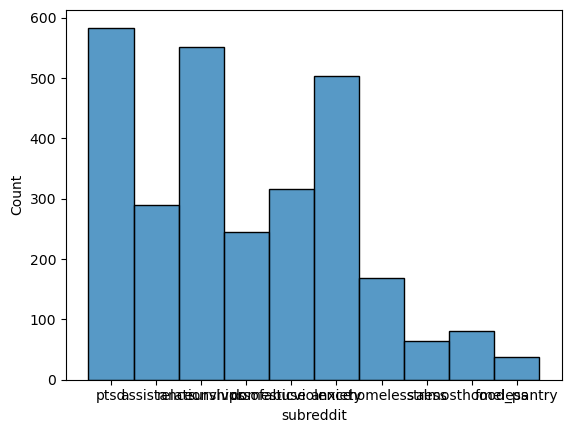

In [9]:
sns.histplot(x='subreddit',data=stress)

In [10]:
y=stress['label']
y

0       1
1       0
2       1
3       1
4       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2838, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
x=stress.drop(['label','post_id'],axis=1)
x

,subreddit,sentence_range,text,confidence,social_timestamp
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",0.800000,1521614353
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",1.000000,1527009817
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,0.800000,1535935605
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",0.600000,1516429555
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,0.800000,1539809005
...,...,...,...,...,...
2833,relationships,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1.000000,1515187044
2834,ptsd,"[20, 25]",I don't have the ability to cope with it anymo...,1.000000,1539827412
2835,anxiety,"(5, 10)",In case this is the first time you're reading ...,1.000000,1539269312
2836,almosthomeless,"[5, 10]",Do you find this normal? They have a good rela...,0.571429,1488938143


In [14]:
x['subreddit']=le.fit_transform(x['subreddit'])
x

,subreddit,sentence_range,text,confidence,social_timestamp
0,6,"(15, 20)","He said he had not felt that way before, sugge...",0.800000,1521614353
1,2,"(0, 5)","Hey there r/assistance, Not sure if this is th...",1.000000,1527009817
2,6,"(15, 20)",My mom then hit me with the newspaper and it s...,0.800000,1535935605
3,7,"[5, 10]","until i met my new boyfriend, he is amazing, h...",0.600000,1516429555
4,9,"[0, 5]",October is Domestic Violence Awareness Month a...,0.800000,1539809005
...,...,...,...,...,...
2833,7,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1.000000,1515187044
2834,6,"[20, 25]",I don't have the ability to cope with it anymo...,1.000000,1539827412
2835,1,"(5, 10)",In case this is the first time you're reading ...,1.000000,1539269312
2836,0,"[5, 10]",Do you find this normal? They have a good rela...,0.571429,1488938143


In [15]:
x['sentence_range']=le.fit_transform(x['sentence_range'])
x

,subreddit,sentence_range,text,confidence,social_timestamp
0,6,17,"He said he had not felt that way before, sugge...",0.800000,1521614353
1,2,3,"Hey there r/assistance, Not sure if this is th...",1.000000,1527009817
2,6,17,My mom then hit me with the newspaper and it s...,0.800000,1535935605
3,7,145,"until i met my new boyfriend, he is amazing, h...",0.600000,1516429555
4,9,87,October is Domestic Violence Awareness Month a...,0.800000,1539809005
...,...,...,...,...,...
2833,7,131,"* Her, a week ago: Precious, how are you? (I i...",1.000000,1515187044
2834,6,114,I don't have the ability to cope with it anymo...,1.000000,1539827412
2835,1,61,In case this is the first time you're reading ...,1.000000,1539269312
2836,0,145,Do you find this normal? They have a good rela...,0.571429,1488938143


In [16]:
x['text']=le.fit_transform(x['text'])
x

,subreddit,sentence_range,text,confidence,social_timestamp
0,6,17,605,0.800000,1521614353
1,2,3,701,1.000000,1527009817
2,6,17,1949,0.800000,1535935605
3,7,145,2810,0.600000,1516429555
4,9,87,2039,0.800000,1539809005
...,...,...,...,...,...
2833,7,131,62,1.000000,1515187044
2834,6,114,961,1.000000,1539827412
2835,1,61,1663,1.000000,1539269312
2836,0,145,413,0.571429,1488938143


In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [18]:
x.shape,X_train.shape,X_test.shape

((2838, 5), (2554, 5), (284, 5))

In [19]:
tree=DecisionTreeClassifier()

In [20]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [21]:
fr=RandomForestClassifier()

In [22]:
fr.fit(X_train,y_train)
X_train_pred=fr.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

fr.fit(X_test,y_test)
X_test_pred=fr.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [23]:
knn=KNeighborsClassifier()

In [24]:
knn.fit(X_train,y_train)
X_train_pred=knn.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

knn.fit(X_test,y_test)
X_test_pred=knn.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.6918559122944401
accuracy score of test data: 0.7077464788732394


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [27]:
input_data=(2,3,701,1.000000,1527009817)
input_data_as_np=np.asarray(input_data)
reshaped=input_data_as_np.reshape(1,-1)
prediction=tree.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
if(prediction[0]==1):
    print("Have Stress")
else:
    print("No stress")

No stress
